<a href="https://colab.research.google.com/github/PaulNjinu254/Credit-Analysis-Final/blob/main/Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving train.csv to train (8).csv
=== Head of Data ===
   SK_ID_CURR  default NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      150293        0         Cash loans           M            Y   
1      102579        0         Cash loans           F            N   
2      106708        0         Cash loans           M            N   
3      359769        0         Cash loans           F            N   
4      444585        0    Revolving loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    495000.0      13743.0   
1               N             0          112500.0    490495.5      26014.5   
2               Y             0          180000.0    450000.0      20979.0   
3               Y             1          202500.0    636138.0      23499.0   
4               Y             0           49500.0    270000.0      13500.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT

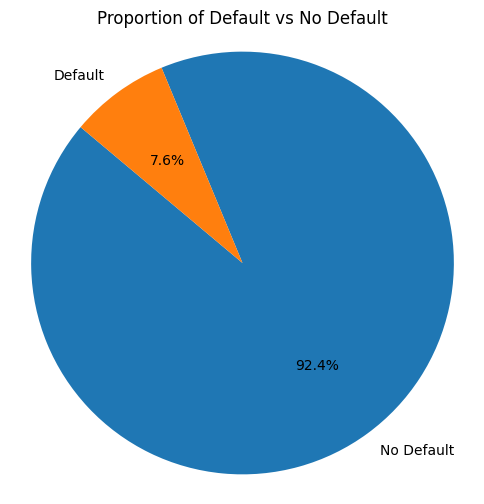

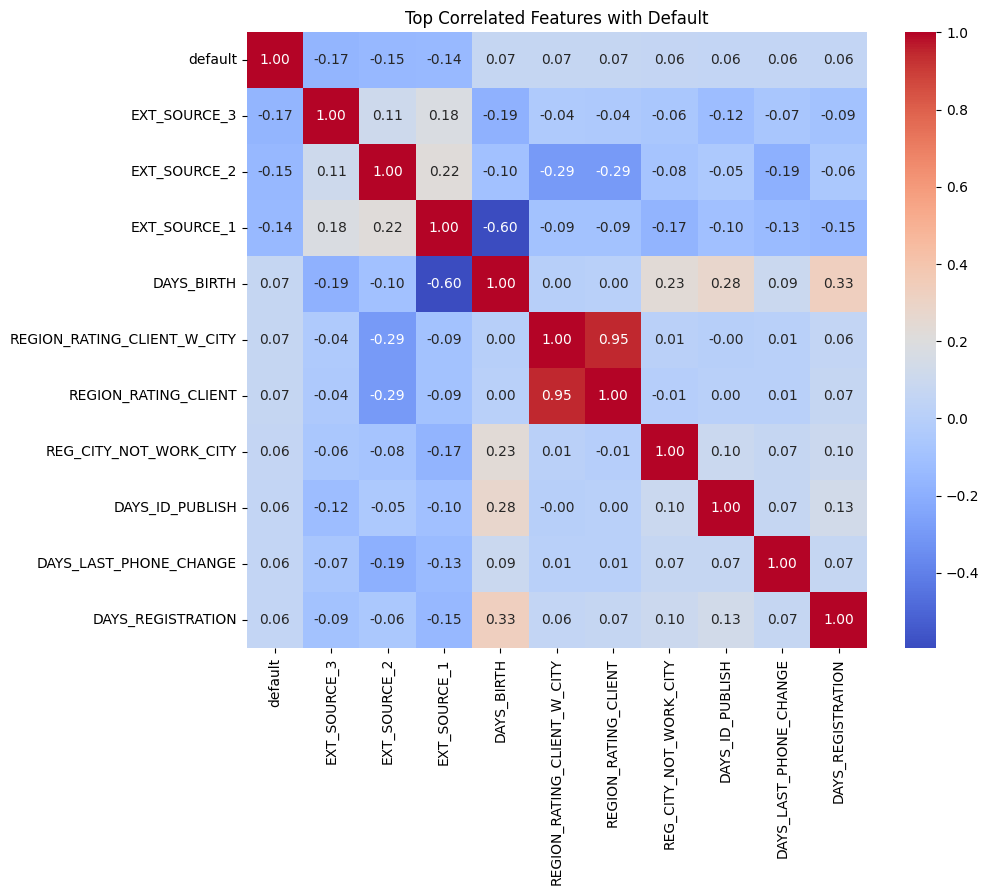


Highly correlated feature pairs:
                             REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY                          NaN              0.946868
REGION_RATING_CLIENT                            0.946868                   NaN


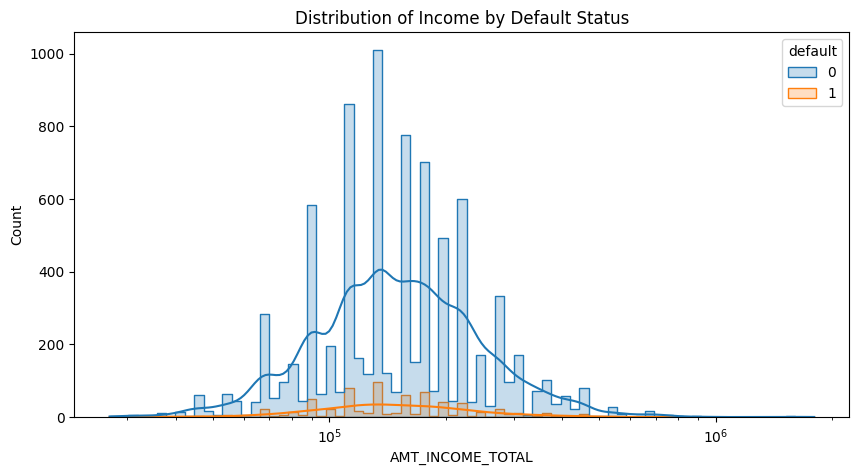

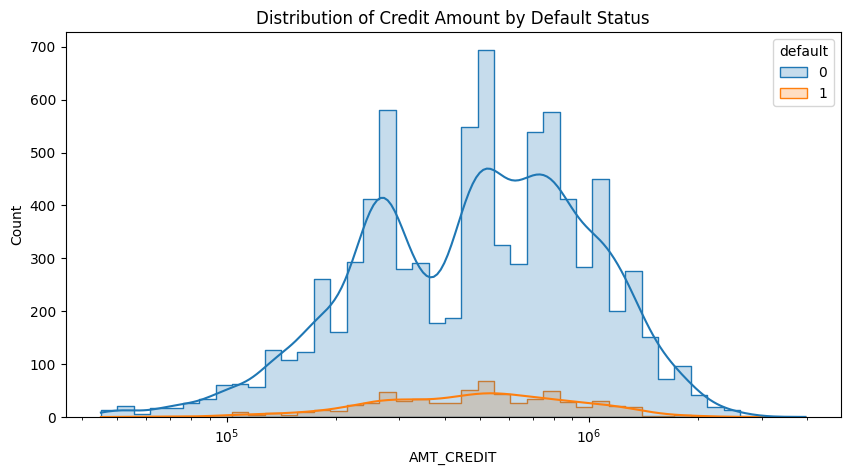

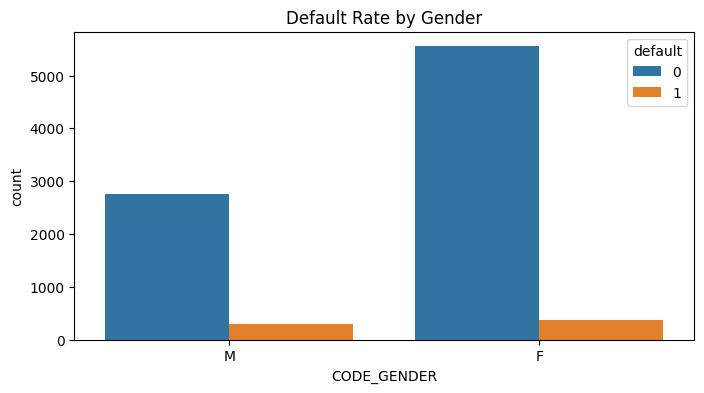

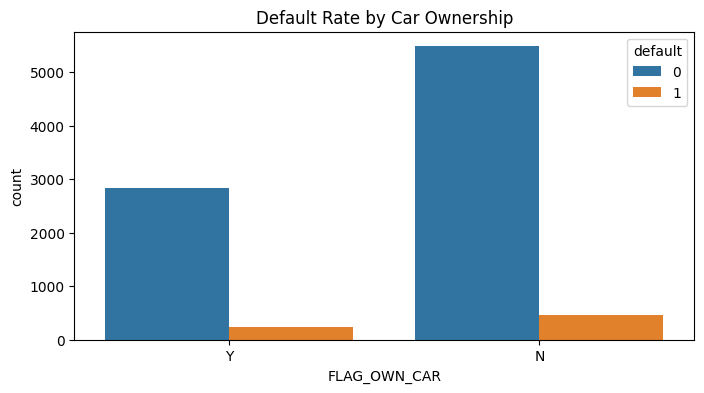

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('train.csv')

print("=== Head of Data ===")
print(data.head())

print("\n=== Info ===")
print(data.info())

print("\n=== Statistical Description ===")
print(data.describe())

# 4. What percentage of the target class (default) is 1 vs 0?
target_counts = data['default'].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['No Default', 'Default'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Default vs No Default')
plt.axis('equal')
plt.show()

# 5. Which numeric features are most correlated with the target variable?
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr = numeric_data.corr()

# Extract top 10 features most correlated with 'default'
top_corr_features = corr['default'].abs().sort_values(ascending=False).head(11).index  # includes 'default'
top_corr_matrix = numeric_data[top_corr_features].corr()

# Display heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlated Features with Default')
plt.show()

# 6. Are there highly correlated independent features (multicollinearity)?
# Check top correlation pairs among predictors
threshold = 0.8
high_corr = top_corr_matrix[(top_corr_matrix > threshold) & (top_corr_matrix < 1.0)]
print("\nHighly correlated feature pairs:")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))

# 7. How do income and credit amount relate to default?
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='AMT_INCOME_TOTAL', hue='default', kde=True, element='step', log_scale=True)
plt.title('Distribution of Income by Default Status')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='AMT_CREDIT', hue='default', kde=True, element='step', log_scale=True)
plt.title('Distribution of Credit Amount by Default Status')
plt.show()

# 8. Does gender or owning a car influence default?
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='CODE_GENDER', hue='default')
plt.title('Default Rate by Gender')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='FLAG_OWN_CAR', hue='default')
plt.title('Default Rate by Car Ownership')
plt.show()